In [1]:
import pandas as pd # data processing, CSV file I/O 
import os #To Interact with local system directories
import numpy as np # linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # plotting
from scipy import stats #import chi2_contigency #  for Chi square Test
from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestClassifier # checking if this is available
%matplotlib inline 

In [2]:
os.getcwd()

'C:\\Users\\Sohel Rahaman'

In [3]:
#set current working directory
os.chdir('D:\edwisor\Project Docs')

In [4]:
#get working directory
os.getcwd()

'D:\\edwisor\\Project Docs'

In [5]:
#load data - reading .csv file
bike_data=pd.read_csv('day.csv')

In [6]:
#first five rows of data
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
#data summary
bike_data.shape

(731, 16)

In [8]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
#****************Univariate Analysis***************#
# function for univariate distribution
def univ_dist(x):
    
    sns.distplot(x, rug=True, rug_kws={"color": "b"},
             kde_kws={"color": "k", "lw": 3, "label": "KDE"},
             hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "b"})

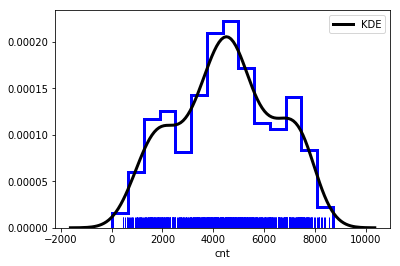

In [10]:
# distribution of  target variable 'cnt'
univ_dist(bike_data['cnt'])

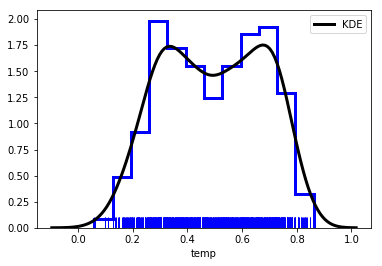

In [11]:
# distrubution of  independent variable 'temp'
univ_dist(bike_data['temp'])

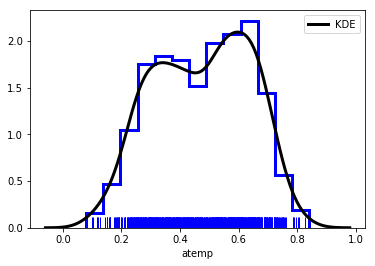

In [12]:
# distrubution of  independent variable 'atemp'
univ_dist(bike_data['atemp'])

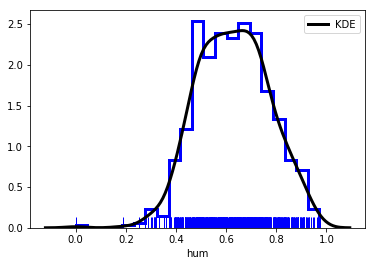

In [13]:
# distrubution of  independent variable 'hum'
univ_dist(bike_data['hum'])

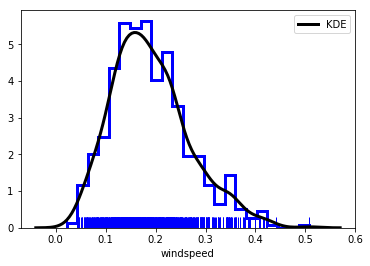

In [14]:
# distrubution of  independent variable 'windspeed'
univ_dist(bike_data['windspeed'])

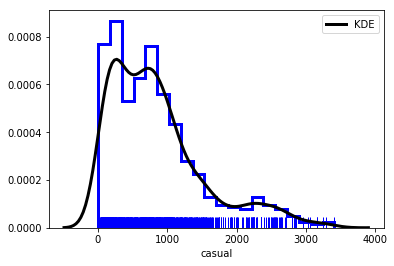

In [15]:
# distrubution of  independent variable 'casual'
univ_dist(bike_data['casual'])

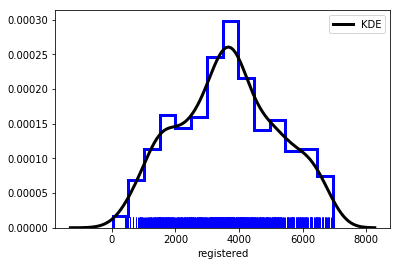

In [16]:
# distrubution of  independent variable 'casual'
univ_dist(bike_data['registered'])

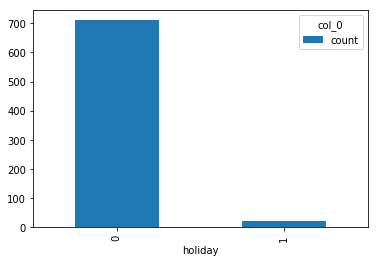

In [17]:
# Visualize categorical Variable 'holiday' 

holi_count = pd.crosstab(index = bike_data['holiday'], 
                              columns="count") 

holi_count.plot.bar()

# the visualization is showing that almost all the  bike rentals are happening  on holidays

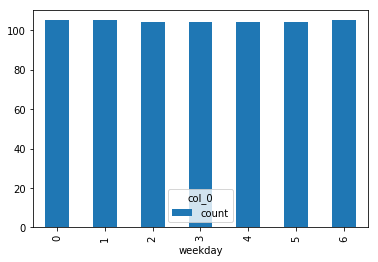

In [18]:
# Visualize categorical Variable 'weekday' 

wd_count = pd.crosstab(index = bike_data['weekday'], 
                              columns="count") 

wd_count.plot.bar()

# the visualization is showing bike rental counts are same on all weekdays

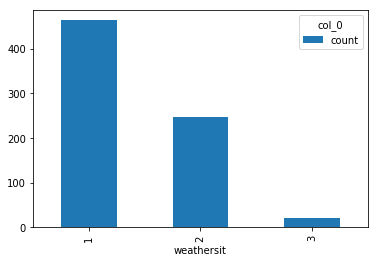

In [19]:
# Visualize categorical Variable 'weathersit' 

ws_count = pd.crosstab(index = bike_data['weathersit'], 
                              columns="count") 

ws_count.plot.bar()

# bike rental count  is more when  weather is " Clear, Few clouds, Partly cloudy, Partly cloudy"

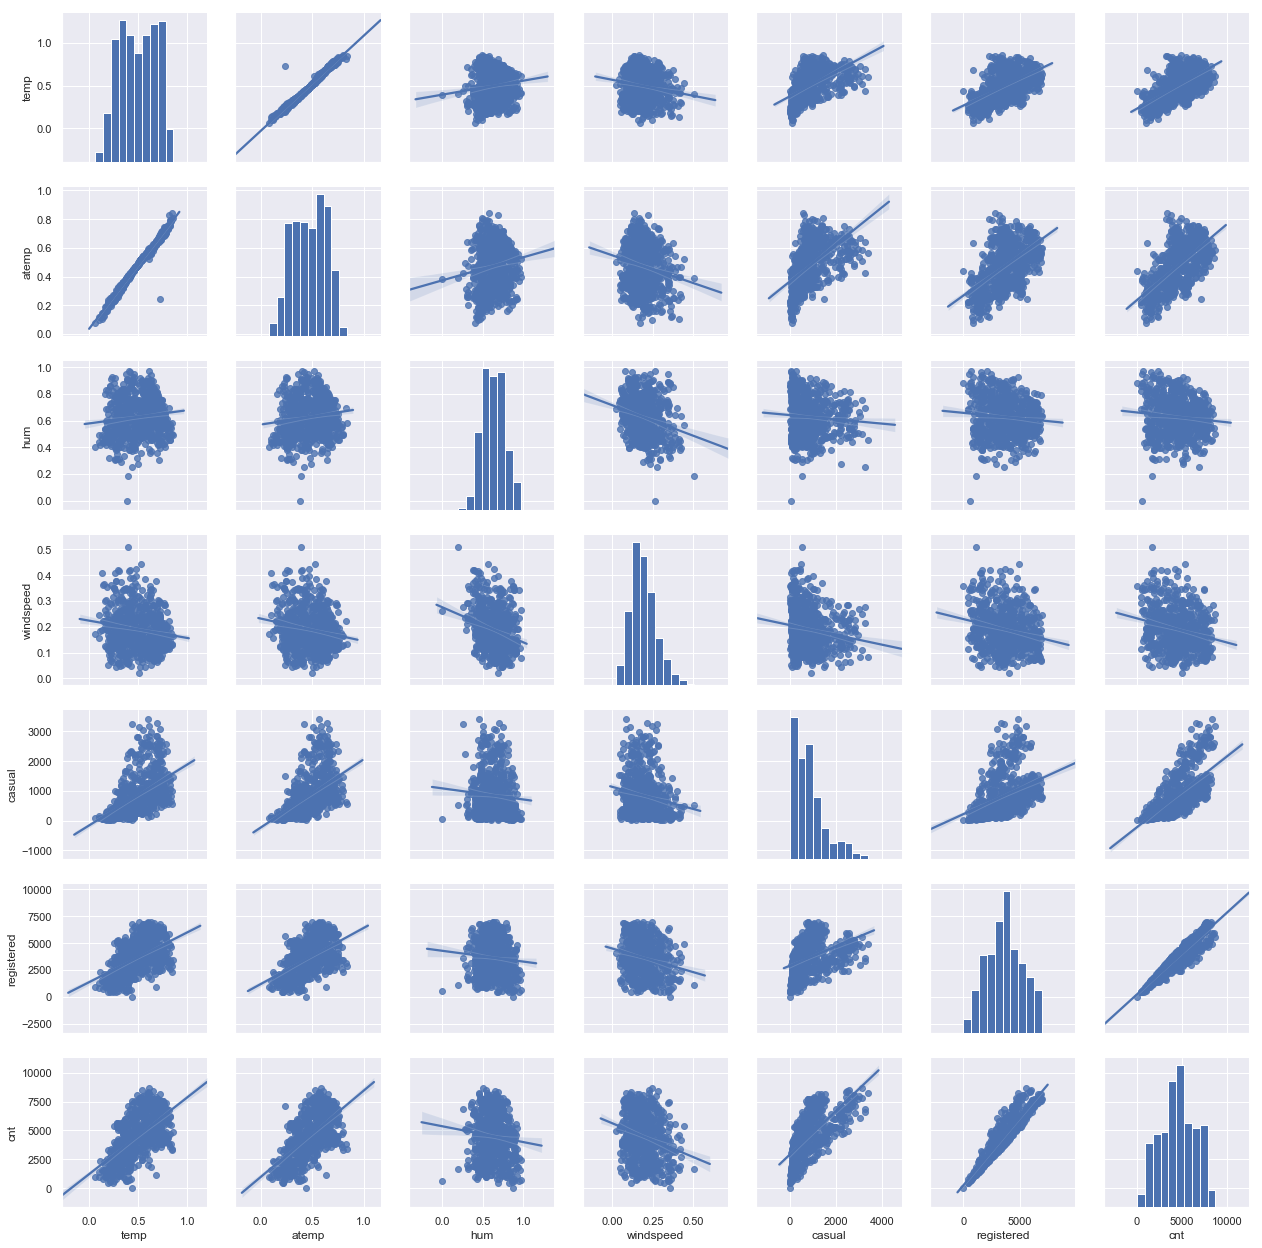

In [20]:
#*****************Multivariate Analysis*********************#
sns.set()
vars=['temp','atemp','hum','windspeed','casual','registered','cnt']
sns.pairplot(bike_data[vars],height=2.5,kind='reg')

In [21]:
#*************************Missing Value Analysis***************************#
#create dataframe with missing percentage
missing_val=pd.DataFrame(bike_data.isnull().sum())

In [22]:
#rename variable
missing_val=missing_val.rename(columns={0:'Missing_percentage'})

In [23]:
#calculate percentage
missing_val['Missing_percentage']=(missing_val['Missing_percentage']/len(bike_data))*100

In [24]:
missing_val

,Missing_percentage
instant,0.0
dteday,0.0
season,0.0
yr,0.0
mnth,0.0
holiday,0.0
weekday,0.0
workingday,0.0
weathersit,0.0
temp,0.0


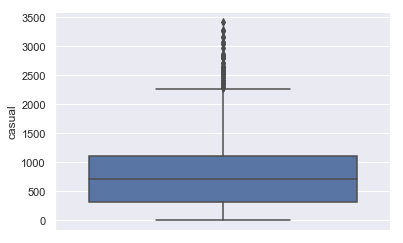

In [25]:
#********************** Outlier Analysis *********************#

# boxplot for  casual  variable

val_out = sns.boxplot(x=bike_data['casual'],orient ='v')

# Boxplot is showing there are few outliers in  casual variables

0.6728044333386831

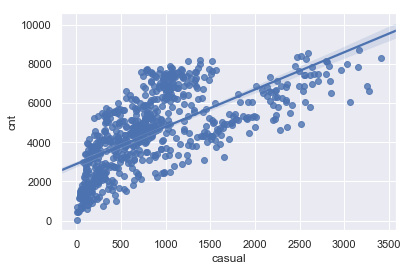

In [26]:
# Correlation before  outlier treatment

# Correlation between 'casual' and 'cnt'  before  removal of  outliers
sns.regplot(x="casual", y="cnt", data=bike_data);

bike_data['casual'].corr(bike_data['cnt'])

In [32]:
#************Treat Outliers***************#
cnames = ['casual']
for i in cnames:
    q75, q25 = np.percentile(bike_data.loc[:,i], [75 ,25])
    iqr = q75 - q25
     
     
        
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
        
print(min)
print(max)



-0.25154049295774644
0.6645393192488263


In [33]:
# #Remove outliers using boxplot method

bike_data = bike_data.drop(bike_data[bike_data.loc[:,i] < min].index)
bike_data = bike_data.drop(bike_data[bike_data.loc[:,'casual'] > max].index)

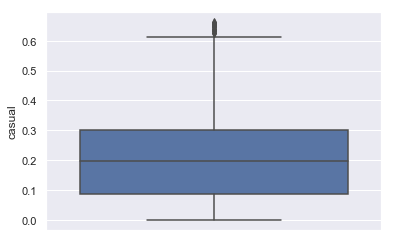

In [34]:
# Boxplot for casual after outlier removal

val_out = sns.boxplot(x=bike_data['casual'],orient ='v')

0.6460020508747334

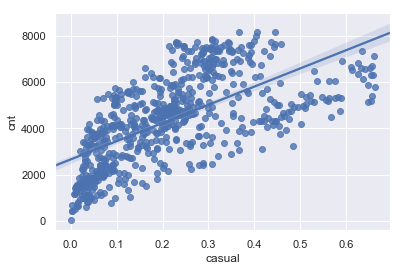

In [35]:
# Correlation between 'casual' and 'cnt'  after  removal of  outliers
sns.regplot(x="casual", y="cnt", data=bike_data);

bike_data['casual'].corr(bike_data['cnt'])

In [27]:
#********************Feature Selection or dimension reduction*******************#

# verify correleation between Numeric variable
numeric_vals = bike_data.loc[:,['temp','atemp','hum','windspeed','casual','registered','cnt']]

In [28]:
numeric_vals.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.0,0.99,0.13,-0.16,0.54,0.54,0.63
atemp,0.99,1.0,0.14,-0.18,0.54,0.54,0.63
hum,0.13,0.14,1.0,-0.25,-0.077,-0.091,-0.1
windspeed,-0.16,-0.18,-0.25,1.0,-0.17,-0.22,-0.23
casual,0.54,0.54,-0.077,-0.17,1.0,0.4,0.67
registered,0.54,0.54,-0.091,-0.22,0.4,1.0,0.95
cnt,0.63,0.63,-0.1,-0.23,0.67,0.95,1.0


In [29]:
# correlation matrix  stating  'temp' and 'atemp' having strong relationship
# and there is no  relationship between 'hum' and 'cnt'

#  dimensional  reduction

bika_data=bike_data.drop(['atemp','hum'],axis=1)

In [30]:
#*******************Normality Check**********************#

cnames = ['casual','registered']

for i in cnames :
    print(i)
    x = (bike_data[i] - min(bike_data[i]))/(max(bike_data[i]) - min(bike_data[i]))
    bike_data[i]=x



casual
registered


In [31]:
#check value after normalization
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,0.096538,0.091539,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,0.037852,0.093849,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,0.034624,0.174560,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,0.031103,0.207046,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,0.023474,0.216286,1600


In [58]:
#*******************Model Development***********************#

#Divide data into train and test using sampling method

from sklearn.model_selection import train_test_split

train, test = train_test_split(bike_data, test_size=0.2)

#train.shape

train.head()
#test.shape
#train.iloc[:,2:13]
#test.head()
#train.iloc[:,13]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
664,665,2012-10-26,4,1,10,0,5,1,2,0.545833,0.522750,0.807083,0.132467,0.346244,0.901242,7444
380,381,2012-01-16,1,1,1,1,1,0,1,0.190000,0.190663,0.522500,0.231358,0.063087,0.297574,2298
376,377,2012-01-12,1,1,1,0,4,1,2,0.382500,0.381938,0.802917,0.180967,0.078345,0.549812,4097
597,598,2012-08-20,3,1,8,0,1,1,2,0.635833,0.595967,0.734167,0.129979,0.300469,0.791799,6530
707,708,2012-12-08,4,1,12,0,6,0,2,0.381667,0.389508,0.911250,0.101379,0.337735,0.636587,5582


In [70]:
#********************************** Decision Tree  Regressor ************************************
#Importing Decision Tree Regressor from sklear.tree
from sklearn.tree import DecisionTreeRegressor

In [71]:
train_bike_DT = train[['season','yr','mnth','holiday','weekday','weathersit','temp','windspeed','casual','registered']].values
train_bike_target_DT = train['cnt'].values
test_bike_DT = test[['season','yr','mnth','holiday','weekday','weathersit','temp','windspeed','casual','registered']].values
test_bike_target_DT= test['cnt'].values

In [112]:
#Decision tree algorithm
fit_DT=DecisionTreeRegressor(max_depth=7,min_samples_split=4).fit(train_bike_DT, train_bike_target_DT)

In [113]:
#Apply model on test data
predictions_DT = fit_DT.predict(test_bike_DT)
print(predictions_DT)

[5198.85714286 6418.66666667 3210.25       4832.36363636 4773.
 4832.36363636 3995.82352941 1635.         5064.375       968.33333333
 2416.88888889 4909.         4634.27586207 4099.45       4099.45
 3540.         5551.         3083.33333333 2416.88888889 5851.5
 6279.92307692 2405.63636364 6577.         3786.         5471.8
 7070.         4634.27586207 3995.82352941 5848.5        5848.5
 4576.16666667 1026.5        8116.33333333 2195.72727273 4414.5
 4832.36363636 5851.5        3540.         4634.27586207 4634.27586207
 5473.         4634.27586207 1407.2        1026.5        5107.
 5471.8         777.5        1137.16666667 5696.         2195.72727273
 4414.5        7359.         1994.58333333 2195.72727273 4576.16666667
 4634.27586207 4338.9        2416.88888889 5064.375      4634.27586207
 5696.         2416.88888889 7500.61538462 5198.85714286 4634.27586207
 5198.85714286 4832.36363636 2799.5        7617.33333333 3621.25
 1732.2        4338.9        4365.         7617.33333333 4634.

In [114]:
#Calculate MAPE

MAPE(test_bike_target_DT, predictions_DT)

# Error  is getting  "3.574677412840687"

3.574677412840687

In [115]:
#calculate RMSE
RMSE(test_bike_target_DT, predictions_DT)

#RMSE : 174.9565302408941

174.9565302408941

In [117]:
#************************************ Random Forest **********************************#
train_bike_RF = train[['season','yr','mnth','holiday','weekday','weathersit','temp','windspeed','casual','registered']].values
train_bike_target_RF = train['cnt'].values
test_bike_RF = test[['season','yr','mnth','holiday','weekday','weathersit','temp','windspeed','casual','registered']].values
test_bike_target_RF= test['cnt'].values

In [119]:
# Instantiate random forest and train on new features
from sklearn.ensemble import RandomForestRegressor

RF_model_1 = RandomForestRegressor(n_estimators= 500, random_state=100).fit(train_bike_RF,train_bike_target_RF)

print(RF_model_1)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=100, verbose=0, warm_start=False)


In [121]:
# Predict the model using predict funtion

RF_predict_1= RF_model_1.predict(test_bike_RF)

print(RF_predict_1)

[5201.012 6341.844 3146.992 4829.072 4738.754 4761.632 4089.974 1711.566
 5294.43   712.85  2463.592 5146.928 4719.026 3916.908 3991.076 3601.46
 5577.894 3236.456 2345.176 5789.202 5979.136 2402.848 6530.678 3763.28
 5363.356 7062.84  4641.12  3551.638 5701.368 5434.968 4760.744 1086.93
 7899.786 2181.682 4349.79  4952.358 5806.698 3396.394 4708.37  4482.25
 5940.788 4457.046 1404.246 1020.812 5016.034 5662.494  995.654 1151.294
 5702.98  2270.174 4584.964 7377.82  1883.898 2137.554 4735.864 4868.466
 4234.434 2467.022 5046.012 4865.052 5505.444 2436.13  7455.926 5194.03
 4809.924 5135.908 4867.528 2977.352 7607.356 3517.836 1711.59  4374.314
 4188.036 7567.448 4719.478 3759.526 4080.286 4339.762  666.228 4646.386
 6612.83  1518.412 5000.548 4934.536 2129.48  4285.71  4052.82  6015.248
 4385.392 5629.828 3676.874 3043.34  1705.298 4557.996 2815.98  1850.282
 4678.666 7463.66  6278.26  7723.858 4892.862 4757.832 4816.634 5212.354
 1696.636 3395.042 1196.45  5874.566 5499.032 3578.658 1

In [122]:
#Evaluate Random forest using  MAPE 

MAPE(test_bike_target_RF,RF_predict_1)

#Error rate is 1.8892217714242245

#Here it is stating accuracy of the model increases

1.8892217714242245

In [123]:
#Evaluate  Model using  RMSE

RMSE(test_bike_target_RF,RF_predict_1)

#RMSE =  96.82684092166575

96.82684092166575

In [125]:
import sklearn.feature_selection as fs # feature selection library in scikit-learn


mir_result = fs.mutual_info_regression(train_bike_RF, train_bike_target_RF) # mutual information regression feature ordering
mir_result

C:\Users\Sohel Rahaman\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


array([0.24748717, 0.27078076, 0.40821537, 0.00238345, 0.04462645,
       0.06701671, 0.40116907, 0.        , 0.66975712, 1.79293222])

In [128]:
#tuning  Random FOrest Model

importances = list(RF_model_1.feature_importances_)

print(importances)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(train_bike_RF, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[0.00019233643648628872, 0.0002177962317447586, 0.0004940942013455429, 2.382296634318707e-05, 0.00037106896348251914, 0.00019634556783642326, 0.0012909920637874267, 0.0005787915979956201, 0.05138221383317381, 0.9452525381378049]


In [130]:
train_bike_one= train[['season','yr','mnth','holiday','weekday','weathersit','temp','windspeed','casual','registered']]
train_bike_one
for name, importance in zip(train_bike_one, mir_result):
    print(name, "=", importance)

season = 0.24748717058535696
yr = 0.2707807625850309
mnth = 0.4082153699861495
holiday = 0.0023834508644937635
weekday = 0.04462645422790512
weathersit = 0.06701670976776986
temp = 0.4011690740187479
windspeed = 0.0
casual = 0.6697571190901246
registered = 1.7929322234528953


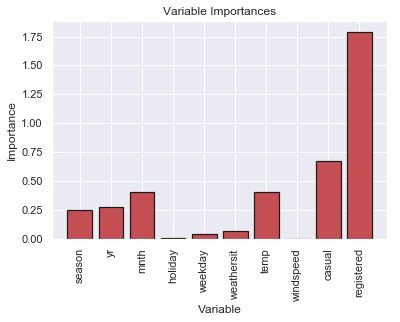

In [131]:
# list of x locations for plotting
x_values = list(range(len(mir_result)))

# Make a bar chart
plt.bar(x_values, mir_result, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)

# Tick labels for x axis
plt.xticks(x_values, train_bike_one, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [132]:
#the  above graph is stating  that  only  few features are important to decide the  accuracy of the model
# Now we 
#will check our model accuracy  by reducing features
train_bike_RF2 = train[["yr" ,"mnth","weekday","workingday","temp","casual","registered"]].values
test_bike_RF2= test[["yr" ,"mnth","weekday","workingday","temp","casual","registered"]].values
# build random forest model

Rf_model_2 = RandomForestRegressor(n_estimators= 500, random_state=100).fit(train_bike_RF2,train_bike_target_RF)

In [134]:
#print(RF_model)
# Predict the model using predict funtion

RF_predict_2= Rf_model_2.predict(test_bike_RF2)

print(RF_predict_2)

[5220.556 6329.896 3144.648 4835.058 4722.738 4753.342 4085.914 1696.59
 5292.68   719.734 2461.94  5132.5   4724.676 3913.698 3987.068 3605.928
 5546.664 3272.78  2342.184 5799.916 5965.656 2427.754 6515.224 3764.516
 5363.984 7061.544 4642.854 3551.794 5761.69  5438.954 4768.394 1066.754
 7920.528 2183.354 4367.928 4933.9   5812.298 3374.196 4726.326 4483.848
 5935.416 4457.278 1403.386 1009.786 5013.846 5655.324  993.038 1156.85
 5699.252 2281.15  4602.912 7379.12  1892.546 2126.744 4755.27  4867.868
 4234.6   2463.254 5042.188 4870.182 5503.216 2439.446 7461.64  5191.398
 4815.988 5143.63  4860.97  2985.582 7617.162 3499.56  1710.048 4385.08
 4184.554 7579.376 4715.096 3745.014 4079.672 4338.82   653.362 4647.252
 6620.672 1511.514 5008.164 4938.57  2137.584 4274.326 4036.048 5997.406
 4381.948 5627.516 3668.046 3033.318 1710.454 4547.17  2817.004 1841.424
 4680.738 7462.71  6282.698 7705.718 4890.442 4776.594 4821.432 5208.586
 1697.624 3402.698 1201.496 5836.23  5495.074 3578.192

In [136]:
#Evaluate Random forest using  MAPE 

MAPE(test_bike_target_RF,RF_predict_2)

#Error rate is 1.791060129629998

#Here it is stating accuracy of the model increases slightly

1.791060129629998

In [137]:
#Evaluate  Model usinf  RMSE

RMSE(test_bike_target_RF,RF_predict_2)

#RMSE =  90.79736624428348

# Accuracy and  RMSE is improved

90.79736624428348

In [59]:
#*********************Linear Regression*********************#

train_bike_linear = train[['season','yr','mnth','holiday','weekday','weathersit','temp','windspeed','casual','registered']].values

In [60]:
train_bike_target_linear = train['cnt'].values

In [61]:
test_bike_linear = test[['season','yr','mnth','holiday','weekday','weathersit','temp','windspeed','casual','registered']].values

In [62]:
test_bike_target_linear= test['cnt'].values

In [63]:
#import  linear regreesion  

import statsmodels.api as sm

#develop Linear Regression model using sm.ols

linear_regression_model = sm.OLS(train_bike_target_linear, train_bike_linear).fit()

#Summary of model
linear_regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.421e+07
Date:                Tue, 23 Jul 2019   Prob (F-statistic):               0.00
Time:                        14:35:59   Log-Likelihood:                -1512.2
No. Observations:                 549   AIC:                             3044.
Df Residuals:                     539   BIC:                             3088.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3936      0.291      1.352      0.177      -0.178       0.965
x2            -1.0562      0.515     -2.049      0.041      -2.069      -0.044
x3             0.0394      0.085      0.461      0.645      -0.128       0.207
x4             2.9423      1.100      2.676      0.008       0.782       5.102
x5             0.4622      0.084      5.515      0.000       0.298       0.627
x6             4.2637      0.287     14.839      0.000       3.699       4.828
x7             4.1970      1.390      3.019      0.003       1.466       6.928
x8            29.0028      1.831     15.840      0.000      25.406      32.599
x9          3412.4007      1.395   2446.754      0.000    3409.661    3415.140
x10         6934.8647      1.394   4973.992      0.000    6932.126    6937.604
==============================================================================
Omnibus:                        3.257   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.196   Jarque-Bera (JB):                3.337
Skew:                           0.179   Prob(JB):                        0.189
Kurtosis:                       2.866   Cond. No.                         105.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
# Predict  the Test data 

#Predict
predict_LR = linear_regression_model.predict(test_bike_linear)

In [76]:
# Evaluate Linear Regression Model

#evaluate model using MAPE
def MAPE(x_true,x_pred):
    mape=np.mean(np.abs((x_true-x_pred)/x_true)*100)
    return mape

In [77]:
MAPE(test_bike_target_linear,predict_LR)

0.11999756188563936

In [105]:
#MAPE  is 0.11999756188563936

#Predict the model using  RMSE
def RMSE(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [106]:
RMSE(predict_LR,test_bike_target_linear)
#RMSE  is  '3.8643842754912794'

3.8643842754912794

In [138]:
# COnclusion  Linear regression is the  best model for the dataset